In [1]:
path = 'data'

In [2]:
import pandas as pd
import cv2
import numpy as np

In [6]:
import os

In [4]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from scipy.stats import bernoulli

In [7]:
df = pd.read_csv(os.path.join(path, 'driving_log.csv'))

In [8]:
df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [13]:
img_left = plt.imread(os.path.join(path, df.iloc[0]['left'].strip()))
img_center = plt.imread(os.path.join(path, df.iloc[0]['center'].strip()))
img_right = plt.imread(os.path.join(path, df.iloc[0]['right'].strip()))

In [15]:
img_test = cv2.imread(os.path.join(path, df.iloc[0]['left'].strip()))

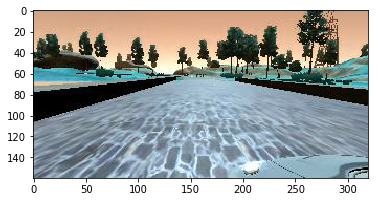

In [17]:
plt.imshow(img_test)

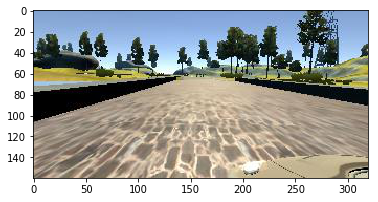

In [14]:
plt.imshow(img_left)

In [3]:
# center image, left, right image

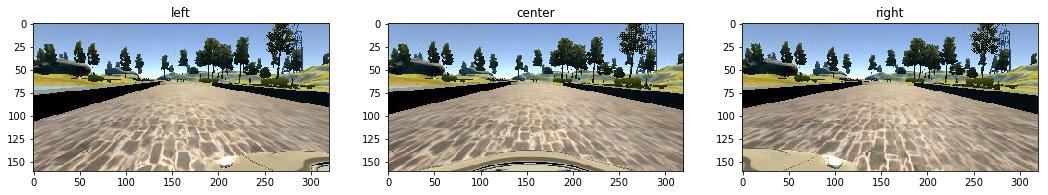

In [45]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(131, title='left')
plt.imshow(img_left)
plt.subplot(132, title='center')
plt.imshow(img_center)
plt.subplot(133, title='right')
plt.imshow(img_right)
fig.savefig('examples/left_center_right_show.jpg')

In [ ]:
# data augment image

In [ ]:
# random fliplr

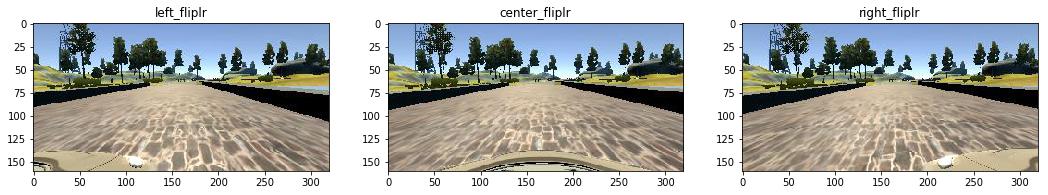

In [46]:
fig = plt.figure(figsize=(18, 6))

img_left = plt.imread(os.path.join(path, df.iloc[0]['left'].strip()))
plt.subplot(131, title='left')
plt.imshow(img_left)
random_left_fliplr = random_fliplr(img_left, df.iloc[0]['steering'])[0]
plt.subplot(131, title='left_fliplr')
plt.imshow(random_left_fliplr)

img_center = plt.imread(os.path.join(path, df.iloc[0]['center'].strip()))
random_center_fliplr = random_fliplr(img_center, df.iloc[0]['steering'])[0]
plt.subplot(132, title='center_fliplr')
plt.imshow(random_center_fliplr)

img_right = plt.imread(os.path.join(path, df.iloc[0]['right'].strip()))
random_right_fliplr = random_fliplr(img_right, df.iloc[0]['steering'])[0]
plt.subplot(133, title='right_fliplr')
plt.imshow(random_right_fliplr)

fig.savefig('examples/fliplr.jpg')

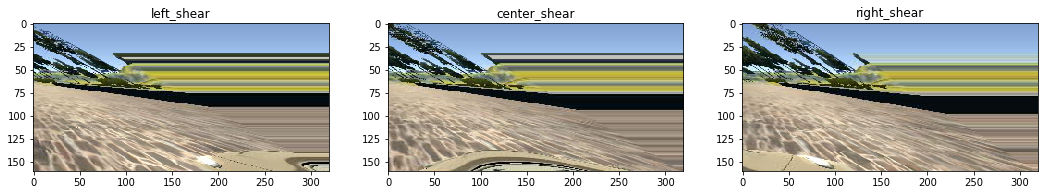

In [39]:
fig = plt.figure(figsize=(18, 6))

img_left = plt.imread(os.path.join(path, df.iloc[0]['left'].strip()))
plt.subplot(131, title='left')
plt.imshow(img_left)
random_left_shear = random_shear(img_left, df.iloc[0]['steering'])[0]
plt.subplot(131, title='left_shear')
plt.imshow(random_left_shear)

img_center = plt.imread(os.path.join(path, df.iloc[0]['center'].strip()))
random_center_shear = random_shear(img_center, df.iloc[0]['steering'])[0]
plt.subplot(132, title='center_shear')
plt.imshow(random_center_shear)

img_right = plt.imread(os.path.join(path, df.iloc[0]['right'].strip()))
random_right_shear = random_shear(img_right, df.iloc[0]['steering'])[0]
plt.subplot(133, title='right_shear')
plt.imshow(random_right_shear)

fig.savefig('examples/shear.jpg')

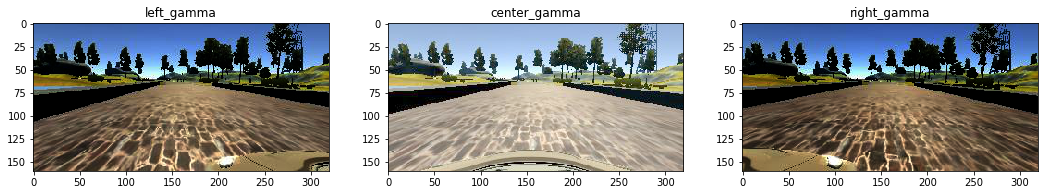

In [42]:
fig = plt.figure(figsize=(18, 6))

img_left = plt.imread(os.path.join(path, df.iloc[0]['left'].strip()))
plt.subplot(131, title='left')
plt.imshow(img_left)
random_left_gamma = random_gamma(img_left)
plt.subplot(131, title='left_gamma')
plt.imshow(random_left_gamma)

img_center = plt.imread(os.path.join(path, df.iloc[0]['center'].strip()))
random_center_gamma = random_gamma(img_center)
plt.subplot(132, title='center_gamma')
plt.imshow(random_center_gamma)

img_right = plt.imread(os.path.join(path, df.iloc[0]['right'].strip()))
random_right_gamma = random_gamma(img_right)
plt.subplot(133, title='right_gamma')
plt.imshow(random_right_gamma)

fig.savefig('examples/gamma.jpg')

In [30]:
def image_random_read(batch_df, i):
    # random select one of center, left, right
    STEERING_COEFFICIENT = 0.23
    rnd_image = np.random.randint(0, 3)
    if rnd_image == 0:
        img_path = batch_df.iloc[i]['left'].strip()
        steering = batch_df.iloc[i]['steering'] + STEERING_COEFFICIENT

    elif rnd_image == 1:
        img_path = batch_df.iloc[i]['center'].strip()
        steering = batch_df.iloc[i]['steering']

    else:
        img_path = batch_df.iloc[i]['right'].strip()
        steering = batch_df.iloc[i]['steering'] - STEERING_COEFFICIENT

    img = cv2.imread(DATA_PATH + '/' + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # necessary for cv2.imread
    # no use for plt.imread
    return img, steering

def image_random_process(img, steering):
    # random fliplr, sheer, rotation, gamma
    img, steering = random_fliplr(img, steering)
    img, steering = random_shear(img, steering)
    # img, steering = random_rotate(img, steering)
    img = random_gamma(img)
    return img, steering

def random_fliplr(img, steering, flipping_prob=0.5):
    """
    Based on the outcome of an coin flip, the image will be flipped.
    If flipping is applied, the steering angle will be negated.
    """

#     head = bernoulli.rvs(flipping_prob)
#     if head:
#         return np.fliplr(img), -1 * steering
#     else:
#         return img, steering
    return np.fliplr(img), -1 * steering

def random_shear(img, steering, shear_range=200):
    rows, cols, ch = img.shape
    dx = np.random.randint(-shear_range, shear_range + 1)
    random_point = [cols / 2 + dx, rows / 2]
    pts1 = np.float32([[0, rows], [cols, rows], [cols / 2, rows / 2]])
    pts2 = np.float32([[0, rows], [cols, rows], random_point])
    dsteering = dx / (rows / 2) * 360 / (2 * np.pi * 25.0) / 6.0
    M = cv2.getAffineTransform(pts1, pts2)
    img = cv2.warpAffine(img, M, (cols, rows), borderMode=1)
    steering += dsteering
    return img, steering

def random_rotate(img, steering, rotation_amount=15):
    # will cost too much time
    angle = np.random.uniform(-rotation_amount, rotation_amount + 1)
    rad = (np.pi / 180.0) * angle
    return rotate(img, angle, reshape=False), steering + (-1) * rad

def random_gamma(img):
    # http://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
    gamma = np.random.uniform(0.4, 1.5)
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    img = cv2.LUT(img, table)
    return(img)